In [1]:
from modules.graph_simulation import KineticRates, System, GraphSimulation
from modules.post_process import PostProcess
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 144/144.0 [00:00<00:00, 145.95it/s]
100%|██████████| 144/144.0 [00:00<00:00, 153.65it/s]
100%|██████████| 144/144.0 [00:00<00:00, 145.78it/s]
100%|██████████| 144/144.0 [00:00<00:00, 169.06it/s]
100%|██████████| 144/144.0 [00:00<00:00, 152.29it/s]
100%|██████████| 144/144.0 [00:00<00:00, 157.67it/s]
100%|██████████| 144/144.0 [00:00<00:00, 162.17it/s]
100%|██████████| 144/144.0 [00:00<00:00, 146.85it/s]
100%|██████████| 144/144.0 [00:00<00:00, 164.23it/s]
100%|██████████| 144/144.0 [00:00<00:00, 159.96it/s]
100%|██████████| 144/144.0 [00:00<00:00, 174.57it/s]
100%|██████████| 144/144.0 [00:00<00:00, 173.55it/s]
100%|██████████| 144/144.0 [00:00<00:00, 175.34it/s]
100%|██████████| 144/144.0 [00:00<00:00, 180.57it/s]
100%|██████████| 144/144.0 [00:00<00:00, 174.57it/s]
100%|██████████| 144/144.0 [00:00<00:00, 162.24it/s]
100%|██████████| 144/144.0 [00:00<00:00, 149.40it/s]
100%|██████████| 144/144.0 [00:00<00:00, 168.31it/s]
100%|██████████| 144/144.0 [00:00<00:00, 170.7

..................................................
gel point 0.5762237762237762


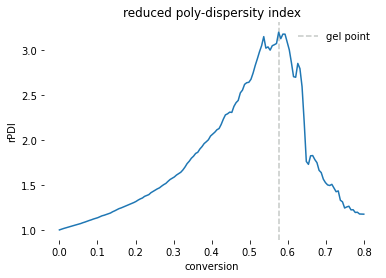

In [2]:
loads = [90, 30]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_30/"
target_conversion = 0.8 # max. extent of reaction
for i in range(50):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p6a_fsse.data"
    conv_path = "./p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axvline(gel_point, ls='--', color="xkcd:silver", label="gel point")
ax.plot(c, rpdi)
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"{loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_30.png", bbox_inches="tight")

100%|██████████| 288/288.0 [00:06<00:00, 43.78it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.81it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.78it/s]
100%|██████████| 288/288.0 [00:06<00:00, 44.01it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.59it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.64it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.68it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.71it/s]
100%|██████████| 288/288.0 [00:06<00:00, 44.00it/s]
100%|██████████| 288/288.0 [00:06<00:00, 44.06it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.66it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.76it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.58it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.32it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.70it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.95it/s]
100%|██████████| 288/288.0 [00:06<00:00, 42.94it/s]
100%|██████████| 288/288.0 [00:06<00:00, 42.81it/s]
100%|██████████| 288/288.0 [00:06<00:00, 43.55it/s]
100%|███████

..............................
gel point 0.5045296167247387


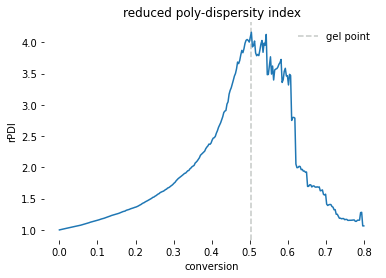

In [3]:
loads = [180, 60]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_60/"
target_conversion = 0.8 # max. extent of reaction
for i in range(30):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p6a_fsse.data"
    conv_path = "./p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axvline(gel_point, ls='--', color="xkcd:silver", label="gel point")
ax.plot(c, rpdi)
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"{loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_60.png", bbox_inches="tight")

100%|██████████| 480/480.0 [00:29<00:00, 16.41it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.48it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.41it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.40it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.45it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.51it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.53it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.45it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.22it/s]
100%|██████████| 480/480.0 [00:29<00:00, 16.28it/s]


..........
gel point 0.5210855949895616


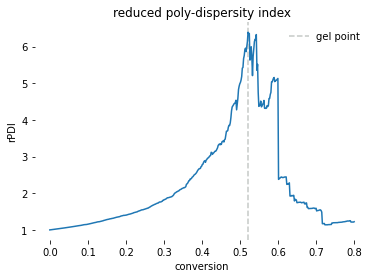

In [4]:
loads = [300, 100]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_100/"
target_conversion = 0.8 # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p6a_fsse.data"
    conv_path = "./p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axvline(gel_point, ls='--', color="xkcd:silver", label="gel point")
ax.plot(c, rpdi)
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"{loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_100.png", bbox_inches="tight")


100%|██████████| 1440/1440.0 [13:03<00:00,  1.84it/s]
100%|██████████| 1440/1440.0 [12:23<00:00,  1.94it/s]
100%|██████████| 1440/1440.0 [12:21<00:00,  1.94it/s]
100%|██████████| 1440/1440.0 [12:25<00:00,  1.93it/s]
100%|██████████| 1440/1440.0 [12:36<00:00,  1.90it/s]


..........
gel point 0.50090340514246


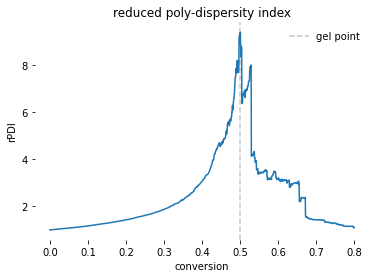

In [2]:
loads = [900, 300]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_300/"
target_conversion = 0.8 # max. extent of reaction
for i in range(5):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p6a_fsse.data"
    conv_path = "./p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axvline(gel_point, ls='--', color="xkcd:silver", label="gel point")
ax.plot(c, rpdi)
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"{loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_300.png", bbox_inches="tight")

In [ ]:
loads = [1800, 600]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_1000/"
target_conversion = 0.8 # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./p6a_fsse.data"
    conv_path = "./p6a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.axvline(gel_point, ls='--', color="xkcd:silver", label="gel point")
ax.plot(c, rpdi)
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"{loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_1000.png", bbox_inches="tight")

### Ideal simulations


In [7]:
from modules.graph_simulation import KineticRates, System, GraphSimulation
from modules.post_process import PostProcess
import matplotlib.pyplot as plt
import numpy as np


loads = [900, 300]
functionalities = [2, 6]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_i300/"
target_conversion = 0.8 # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'ideal', cycles_allowed=True)
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)


100%|██████████| 1440/1440.0 [14:22<00:00,  1.67it/s]
100%|██████████| 1440/1440.0 [14:53<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:55<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:52<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:54<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:54<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:55<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [14:55<00:00,  1.61it/s]
100%|██████████| 1440/1440.0 [13:59<00:00,  1.71it/s]
100%|██████████| 1440/1440.0 [13:54<00:00,  1.72it/s]


In [4]:
from modules.graph_simulation import KineticRates, System, GraphSimulation
from modules.post_process import PostProcess
import matplotlib.pyplot as plt
import numpy as np

loads = [900, 300]
functionalities = [2, 6]
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/constant/"
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
target_conversion = 0.8 # max. extent of reaction
for i in range(10):
    system = System(loads, kinetic_rates)
    fsse1 = [1., 1., 0.]
    fsse2 = [6., 4., 3., 2., 1.5, 1., 0.]
    sim = GraphSimulation(system, [fsse1, fsse2], cycles_allowed=True)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

100%|██████████| 1440/1440.0 [15:16<00:00,  1.57it/s]
100%|██████████| 1440/1440.0 [15:31<00:00,  1.55it/s]
100%|██████████| 1440/1440.0 [14:58<00:00,  1.60it/s]
100%|██████████| 1440/1440.0 [14:00<00:00,  1.71it/s]
100%|██████████| 1440/1440.0 [13:54<00:00,  1.73it/s]
100%|██████████| 1440/1440.0 [14:08<00:00,  1.70it/s]
100%|██████████| 1440/1440.0 [13:54<00:00,  1.72it/s]
100%|██████████| 1440/1440.0 [14:04<00:00,  1.70it/s]
100%|██████████| 1440/1440.0 [14:10<00:00,  1.69it/s]
100%|██████████| 1440/1440.0 [12:33<00:00,  1.91it/s]


In [10]:
output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_i300/"
pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=False)
irpdi = pp.topology_data["dispersion_index"]
imn = pp.topology_data["number_average_size"]
imw = pp.topology_data["weight_average_size"]
ic = np.linspace(0, target_conversion, len(irpdi))
#igel_point = ic[np.nonzero(irpdi == max(irpdi))[0][0]]
#print(f"gel point {igel_point}")

output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/run_300/"
pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=False)
rpdi = pp.topology_data["dispersion_index"]
mn = pp.topology_data["number_average_size"]
mw = pp.topology_data["weight_average_size"]
c = np.linspace(0, target_conversion, len(rpdi))
#gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
#print(f"gel point {gel_point}")

output_folder = "/home/markjenei/polymerisation-graph-simulation/DGEBA-P6A/constant/"
pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=False)
lrpdi = pp.topology_data["dispersion_index"]
lmn = pp.topology_data["number_average_size"]
lmw = pp.topology_data["weight_average_size"]
lc = np.linspace(0, target_conversion, len(lrpdi))
#lgel_point = lc[np.nonzero(lrpdi == max(lrpdi))[0][0]]
#print(f"gel point {lgel_point}")

..........
..........
..........


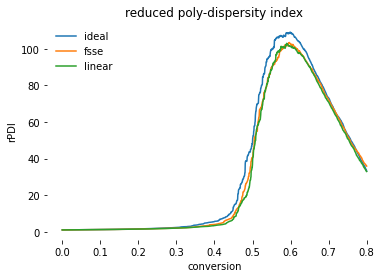

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(ic, irpdi, label='ideal')
ax.plot(c, rpdi, label='fsse')
ax.plot(lc, lrpdi, label='linear')
ax.set_xlabel("conversion")
ax.set_title("reduced poly-dispersity index")
ax.set_ylabel("rPDI")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
f = open("./gel_points", 'a')
f.write(f"i {loads[0]} {loads[1]}\t{gel_point}\n")
f.close()
plt.savefig("./dgeba_p6a_rpdi.png", bbox_inches="tight")

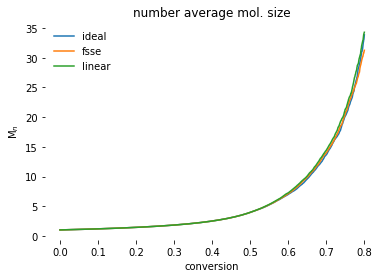

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(ic, imn, label='ideal')
ax.plot(c, mn, label='fsse')
ax.plot(lc, lmn, label='linear')
ax.set_xlabel("conversion")
ax.set_title("number average mol. size")
ax.set_ylabel(r"M$_n$")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
plt.savefig("./dgeba_p6a_mn.png", bbox_inches="tight")

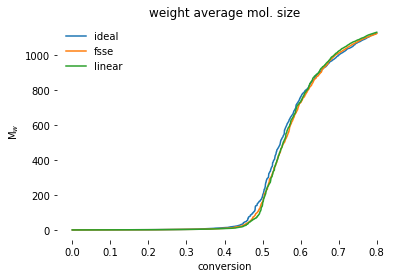

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(ic, imw, label='ideal')
ax.plot(c, mw, label='fsse')
ax.plot(lc, lmw, label='linear')
ax.set_xlabel("conversion")
ax.set_title("weight average mol. size")
ax.set_ylabel(r"M$_w$")
ax.legend(frameon=False)
for side in ["top", "bottom", "left", "right"]:
    ax.spines[side].set_visible(False)
plt.savefig("./dgeba_p6a_mw.png", bbox_inches="tight")